<a href="https://colab.research.google.com/github/pankovakris/hse_course_basic/blob/main/%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82_%22hse_ml_week3_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import numpy as np

In [2]:
df = pd.read_csv('train.csv', header=0, sep=',', quotechar='"')

In [3]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1.0,-73.982155,40.767937,-73.964630,40.765602,N,455.0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1.0,-73.980415,40.738564,-73.999481,40.731152,N,663.0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1.0,-73.979027,40.763939,-74.005333,40.710087,N,2124.0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1.0,-74.010040,40.719971,-74.012268,40.706718,N,429.0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1.0,-73.973053,40.793209,-73.972923,40.782520,N,435.0


In [4]:
df = df.drop('dropoff_datetime', axis=1)

df.pickup_datetime = pd.to_datetime(df.pickup_datetime)

df = df.sort_values(by='pickup_datetime')

In [5]:
df_train = df[:500_000]
df_test = df[500_000:700_000]

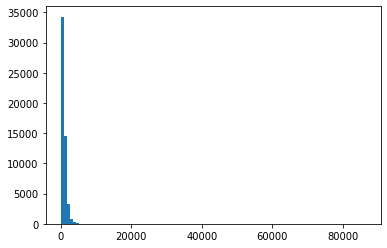

In [6]:
df_train.trip_duration.hist(bins=100, grid=False, )

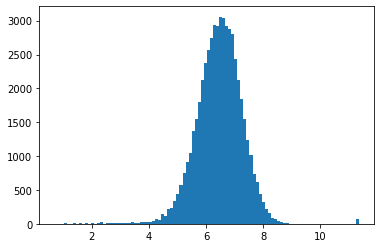

In [7]:
np.log1p(df_train.trip_duration).hist(bins=100, grid=False, )

In [8]:
df_train['log_trip_duration'] = np.log1p(df_train.trip_duration)
df_test['log_trip_duration'] = np.log1p(df_test.trip_duration)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime)

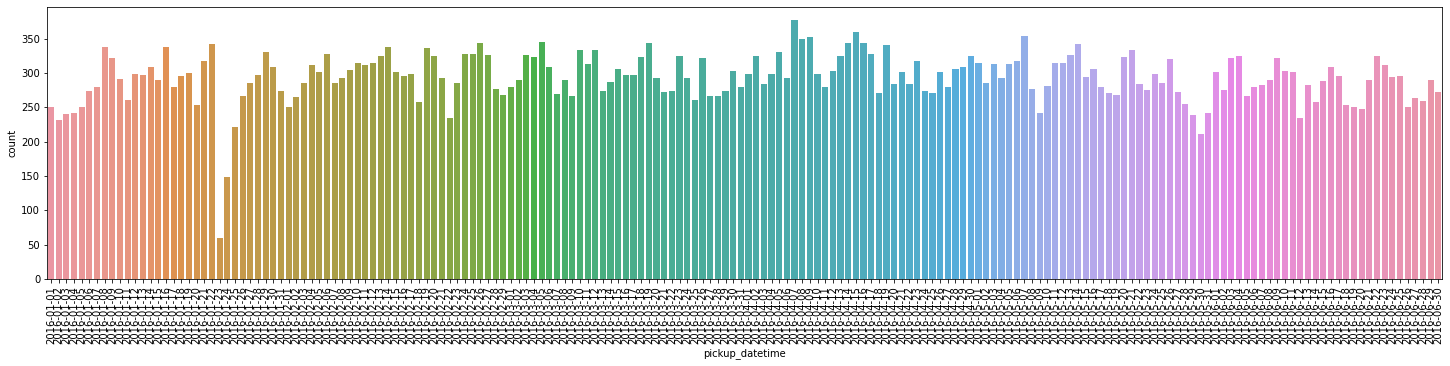

In [14]:
date_sorted = df_train.pickup_datetime.dt.date.sort_values()

plt.figure(figsize=(25, 5))
date_count_plot = sns.countplot(
  x=date_sorted,
)
date_count_plot.set_xticklabels(date_count_plot.get_xticklabels(), rotation=90);

IndexError: ignored

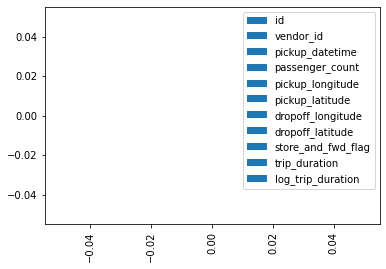

In [15]:
g = df.groupby(df_train.pickup_datetime.dt.weekday).count().plot.bar()

In [ ]:
#CORRECT GRATH 1 !!!!!!!!!!!!!!!

In [ ]:
#LOOOK UP

In [16]:
df = df_test.sort_values(by='trip_duration', ascending=True)
df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration


In [17]:
def create_features(data_frame):
    X = pd.concat([
      data_frame.pickup_datetime.apply(lambda x: x.timetuple().tm_yday),
      data_frame.pickup_datetime.apply(lambda x: x.hour),
      data_frame.pickup_datetime.apply(lambda x: x.day in (23, 24) )
     ], axis=1, keys=['day', 'hour', 'anomaly']
    )
  
    return X, data_frame.log_trip_duration
    

In [19]:
X_train, y_train = create_features(df_train)
X_train = X_train.sort_values(by='anomaly', ascending=False)
X_train.head()

,day,hour,anomaly
18977,83,8,True
21523,145,8,True
40569,145,8,True
39505,145,8,True
2553,145,8,True


In [20]:
X_test, y_test = create_features(df_train)
X_test = X_test.sort_values(by='day', ascending=False)
X_test.head()

,day,hour,anomaly
34048,182,23,False
12453,182,11,False
37186,182,10,False
6722,182,10,False
32619,182,11,False


In [21]:
%time new_X_train, new_y_train = create_features(df_train)

CPU times: user 695 ms, sys: 19.3 ms, total: 714 ms
Wall time: 719 ms


In [53]:
def create_features(data_frame):
    X = pd.concat([
      data_frame.pickup_datetime.apply(lambda x: x.timetuple().tm_yday),
      data_frame.pickup_datetime.apply(lambda x: x.hour),
      data_frame.pickup_datetime.apply(lambda x: x.day in (23, 24) ),
      data_frame.pickup_datetime.apply(lambda x: x.day_name())
     ], axis=1, keys=['day', 'hour', 'anomaly', 'weekday']
    )
  
    return X, data_frame.log_trip_duration
    

In [ ]:
# Ваш код для обучения Lasso регрессии с параметром alpha 2.65e-05 и подсчетом MSE:

from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=2.65e-05)
lasso = lasso_model.fit(new_X_train , new_y_train)
lasso_predict = lasso.predict(new_X_test)

print(mean_squared_error(lasso_predict, new_y_test))
MSE = 28.008


# your code here

In [ ]:
#OHE
new_X_test, new_y_test = create_features(df_test)
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 
ohe = ColumnTransformer([("One hot", OneHotEncoder(sparse=False),[1, 3])], remainder="passthrough")
new_X_test = ohe.fit_transform(new_X_test)
print(len(new_X_test[0]))

In [54]:
X_train, y_train = create_features(df_train)
X_train = X_train.sort_values(by='anomaly', ascending=False)
X_train.head()

,day,hour,anomaly,weekday
18977,83,8,True,Wednesday
21523,145,8,True,Tuesday
40569,145,8,True,Tuesday
39505,145,8,True,Tuesday
2553,145,8,True,Tuesday


ohe import

In [55]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 

In [56]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 
ohe = ColumnTransformer([("One hot", OneHotEncoder(sparse=False),[1])], remainder="passthrough")

In [57]:
X_train = ohe.fit_transform(X_train)

In [58]:
X_test = ohe.transform(X_test)

ValueError: ignored

In [63]:
print(len(X_train[56]))

27
